In [2]:
import pandas as pd
import numpy as np
from numpy.random import default_rng
rng = default_rng()
import matplotlib.pyplot as plt

In [328]:
def niche_model(S, beta):
    # sorted array of length = species number
    n = np.sort(rng.uniform(low = 0, high = 1, size = S))
    r = np.zeros(S)
    
    # set up alpha and beta params and loop through and add diet range values to r array
    aleph = 1
    b = beta
    for i in range(0,S):
        # random number generation from beta dist
        x = rng.beta(aleph, beta)
        r[i] = n[i]*x
    
    # Plotting Prey Range vs. Niche Value of each species
    plt.plot(n,r)
    plt.ylabel("Diet Range")
    plt.xlabel("Niche Value")
    plt.show()
    
    
    # center of the range of each consumer
    c = np.zeros(S)
    for i in range(0,S):
        c[i] = rng.uniform(low = r[i]/2, high = [n[i]])
    
    
    # Determine which prey every consumer eats?
    
    prey = []
    numprey = np.zeros(S)
    
    for i in range(0,S):
        # establish limits of niche range
        nmin = c[i]-(r[i]/2)
        nmax = c[i]+(r[i]/2)
        # determine which species fall between niche min/max
        prey1 = (n>nmin).nonzero()
        prey2 = (n<nmax).nonzero()
        prey.append(np.intersect1d(prey1,prey2))
        p_i = (prey[i]==i).nonzero()
        if len(prey[i]) > 0 and np.any(p_i):
            holder = prey[i]
            holder = np.delete(holder,p_i[0])
            prey[i] = holder
            numprey[i] = len(prey[i])
    plt.plot(n,numprey)
    plt.ylabel("Prey Count")
    plt.xlabel("Niche Value")
    plt.show()
    
    out_mat = np.zeros((S,S), dtype = int)
    
    for i in range(0,S):
        ones_vec = prey[i]
        if np.any(ones_vec):
            for j in ones_vec:
                out_mat[i,j] = 1
                out_mat[j,i] = 1
    
    
    return out_mat

In [352]:
S = 100
C = 0.02
n = np.sort(rng.uniform(low = 0, high = 1, size = S))
r = np.zeros(S)

In [353]:
n

array([9.09274507e-04, 7.19339065e-03, 3.45963054e-02, 4.59068633e-02,
       5.03047161e-02, 6.94355851e-02, 7.67246146e-02, 7.72164568e-02,
       9.60876357e-02, 1.04081867e-01, 1.06526371e-01, 1.30995579e-01,
       1.35763883e-01, 1.43231015e-01, 1.60387690e-01, 1.65879563e-01,
       1.68860027e-01, 1.79266715e-01, 1.85830009e-01, 1.86559213e-01,
       1.95552940e-01, 2.00333668e-01, 2.02074796e-01, 2.13038860e-01,
       2.17126948e-01, 2.74756288e-01, 2.75718438e-01, 2.89301466e-01,
       3.40912472e-01, 3.51431900e-01, 3.57423319e-01, 3.70499688e-01,
       3.78737850e-01, 3.86727233e-01, 3.93926761e-01, 4.14532591e-01,
       4.31194577e-01, 4.42297906e-01, 4.76152641e-01, 4.89451151e-01,
       4.95141048e-01, 5.00426462e-01, 5.00943923e-01, 5.09077546e-01,
       5.18676603e-01, 5.41083891e-01, 5.43739956e-01, 5.45626058e-01,
       5.56828620e-01, 5.61043461e-01, 5.79924834e-01, 5.81213794e-01,
       5.86336678e-01, 6.10653037e-01, 6.23257550e-01, 6.36396246e-01,
      

In [354]:
aleph = 1
beta = (1/C)-1

In [355]:
rng.beta(1, beta)

0.02842546776192141

In [356]:
for i in range(0,S):
        x = rng.beta(aleph, beta)
        r[i] = n[i]*x
print(r)

[1.78935401e-05 2.96761926e-04 1.50672595e-03 1.59832279e-04
 1.77642650e-03 3.76024038e-03 1.44117913e-03 1.39666720e-04
 2.21382563e-03 2.35224209e-04 6.35413416e-04 1.14362534e-03
 2.15805848e-03 6.02457945e-04 5.18643117e-03 5.47927240e-03
 3.89647368e-03 1.78274933e-03 2.97234876e-03 3.87820014e-04
 2.47784645e-03 1.09820250e-03 2.52763397e-03 2.66468962e-03
 5.78118453e-04 7.38805320e-04 8.98766476e-04 2.36696543e-03
 1.02763876e-02 1.01591106e-02 9.33639704e-03 2.85989512e-03
 9.92950891e-03 6.08519344e-03 2.86948533e-03 5.35626292e-03
 1.57441719e-02 6.20172447e-03 4.84245436e-03 2.12101169e-02
 5.69640584e-03 8.72117185e-03 4.77172848e-04 6.02179009e-03
 3.21830120e-02 4.73947569e-04 1.06190153e-02 1.80655784e-03
 4.96164023e-03 1.08958159e-02 6.24093887e-03 7.15310129e-03
 3.88311904e-03 7.33587674e-03 2.11965072e-02 1.52465008e-03
 6.43858743e-03 1.19853102e-02 3.19128450e-03 3.08567496e-02
 2.92733086e-03 1.31764495e-02 1.51789318e-03 2.00501038e-03
 1.24628590e-02 1.098920

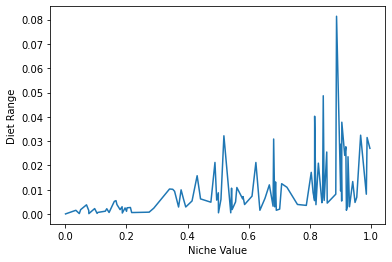

In [357]:
plt.plot(n,r)
plt.ylabel("Diet Range")
plt.xlabel("Niche Value")
plt.show()

In [358]:
c = np.zeros(S)
for i in range(0,S):
    c[i] = rng.uniform(low = r[i]/2, high = [n[i]])


In [359]:
prey = []
numprey = np.zeros(S)

(array([], dtype=int64),)

In [360]:
for i in range(0,S):
    # establish limits of niche range
    nmin = c[i]-(r[i]/2)
    nmax = c[i]+(r[i]/2)
    # determine which species fall between niche min/max
    prey1 = (n>nmin).nonzero()
    prey2 = (n<nmax).nonzero()
    preyClassic = np.intersect1d(prey1,prey2)
    assert preyClassic == preyNovus
    prey.append(np.intersect1d(prey1,prey2))
    p_i = (prey[i]==i).nonzero()
    if len(prey[i]) > 0 and np.any(p_i):
        holder = prey[i]
        holder = np.delete(holder,p_i[0])
        prey[i] = holder
        numprey[i] = len(prey[i])
    

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [297]:
prey

[array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([2, 3]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([5]),
 array([], dtype=int64),
 array([10]),
 array([16]),
 array([], dtype=int64),
 array([4]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([7]),
 array([17]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([6]),
 array([13]),
 array([], dtype=int64),
 array([24]),
 array([17]),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([], dtype=int64),
 array([32, 33, 34, 35, 36, 37, 38, 40]),
 array([13, 14]),
 array([], dtype=int64),
 array([30]),
 array([], dtype=int64),
 array([], dtype=int64),

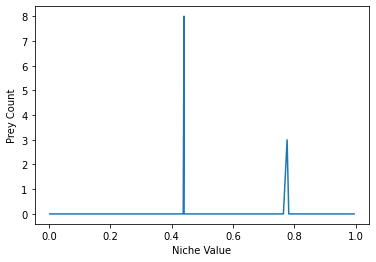

In [298]:
plt.plot(n,numprey)
plt.ylabel("Prey Count")
plt.xlabel("Niche Value")
plt.show()

In [316]:
out_mat = np.zeros((S,S), dtype = int)
out_mat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [319]:
for i in range(0,S):
    ones_vec = prey[i]
    if np.any(ones_vec):
        for j in ones_vec:
            out_mat[i,j] = 1
            out_mat[j,i] = 1

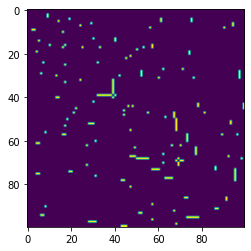

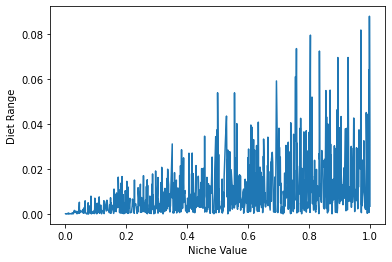

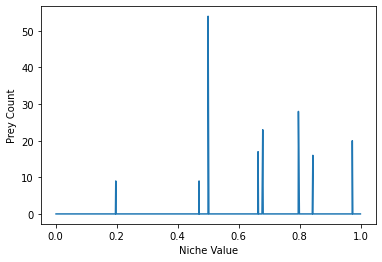

In [361]:
out_mat = niche_model(1000, 49)

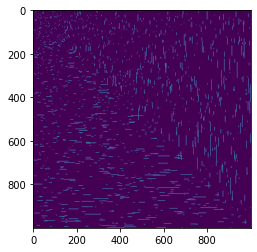

In [362]:
ax = plt.gca()
im = ax.imshow(out_mat)
plt.show()

In [347]:
c

2.5294117647058822